In [132]:
import random
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [133]:
startPopulation = 50
year = 0
curr = 0
runs = 5

infantMortality = 5
youthMortality = 45
agriculture = 5
disasterChance = 10
fertilityx = 15
fertilityy = 44
food = 0

peopleDictionary = []

df = pd.DataFrame(columns = ['runidx', 'X', 'Y'])

In [134]:
class Person:
    def __init__(self, age):
        self.gender = random.randint(0,1)
        self.age = age
        self.pregnant = 0
        
def harvest(food, agriculture):
    ablePeople = 0
    for person in peopleDictionary:
        if person.age > 8:
            ablePeople +=1
            
    food += ablePeople * agriculture

    if food < len(peopleDictionary):
        del peopleDictionary[0:int(len(peopleDictionary)-food)]
        food = 0
    else:
        food -= len(peopleDictionary)
        
def reproduce(fertilityx, fertilityy, infantMortality):
    for person in peopleDictionary:
        if person.gender == 1:
            if person.age > fertilityx:
                if person.age < fertilityy:
                    if random.randint(0,5)==1:
                        if random.randint(0,100)>infantMortality:
                            peopleDictionary.append(Person(0))
                            
def beginSim():
    peopleDictionary.clear()
    
    for x in range(startPopulation):
        peopleDictionary.append(Person(random.randint(18,50)))
        
def runYear(food, agriculture, fertilityx, fertilityy, infantMortality, disasterChance):
    harvest(food, agriculture)
    for person in peopleDictionary:
        mortrate = (0.000002)*(person.age)**3 - 0.0002*(person.age)**2 + 0.0063*(person.age) - 0.0372
            
        if random.random() <= mortrate:
            peopleDictionary.remove(person)
        else:
            person.age +=1
            
    reproduce(fertilityx, fertilityy, infantMortality)
    
    #change disaster chance/effects
    if random.randint(0,100)<disasterChance:
        death_toll_percent = random.gauss(0.10,0.16)
        if death_toll_percent < 0:
            death_toll_percent = 0
        del peopleDictionary[0:int(death_toll_percent*len(peopleDictionary))]
        print(len(peopleDictionary))
        infantMortality *= 0.985
        return infantMortality

while curr < runs:    
    print(f'run start {curr}')
    beginSim()
    year = 0
    while len(peopleDictionary)<100000 and len(peopleDictionary) > 1:
        year += 1
        runYear(food, agriculture, fertilityx, fertilityy, infantMortality, disasterChance)

        print(infantMortality)

        df = df.append({'runidx' : curr, 'X' : year, 'Y' : len(peopleDictionary)}, ignore_index = True)

        clear_output(wait=True)
        print(f'Run: {curr} | Year: {year} | Pop: {len(peopleDictionary)}')
    
    
    curr += 1
        
    

Run: 4 | Year: 1315 | Pop: 100309


In [135]:
df

,runidx,X,Y
0,0,1,53
1,0,2,58
2,0,3,60
3,0,4,60
4,0,5,59
...,...,...,...
7027,4,1311,90755
7028,4,1312,93143
7029,4,1313,95511
7030,4,1314,97853


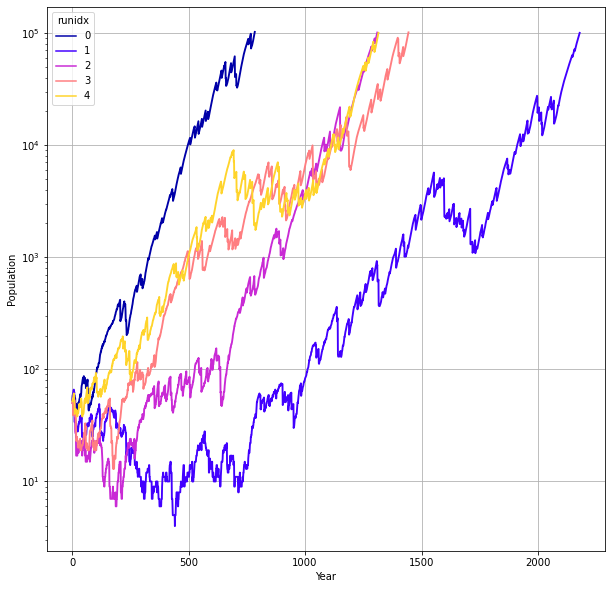

In [137]:
fig, ax = plt.subplots(squeeze=True,figsize=(10,10))

sns.lineplot(x='X',y='Y', data=df,
    linewidth=1.88,
    hue='runidx',
    palette=sns.color_palette('gnuplot2', n_colors=runs),
    )

plt.xlabel('Year')
plt.ylabel('Population')

plt.grid()
plt.yscale('log')
#plt.xscale('log')

plt.show()

#plot where natural disasters occured + relative strength